In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [7]:
%pwd

'C:\\Users\\jeffl\\Desktop\\Final semester\\CS224N'

In [12]:
glove_file = datapath('C:/Users/jeffl/Desktop/Final semester/CS224N/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file)

In [14]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [24]:
model['obama']

array([-0.44413  ,  0.59188  ,  0.98472  , -0.058361 ,  0.6077   ,
       -0.68421  ,  0.019399 ,  0.099464 , -0.13403  ,  0.24832  ,
       -0.24049  , -0.35876  , -0.29002  , -0.39814  ,  0.02137  ,
       -0.25071  , -0.013359 , -0.044295 , -0.29525  , -0.64601  ,
        0.29299  , -0.37601  , -0.3124   , -0.1293   , -0.93938  ,
        0.20459  , -0.72762  ,  0.2271   ,  0.44782  , -0.48476  ,
        0.7424   ,  1.1035   ,  0.6844   ,  0.86386  , -0.22639  ,
        0.68557  , -0.64844  , -0.48585  , -0.18262  ,  1.3293   ,
       -1.4314   , -0.95057  ,  0.94967  ,  0.55113  , -0.84357  ,
       -0.73851  , -0.13937  , -0.0097541, -0.28226  , -0.89138  ,
        0.15243  , -0.2845   ,  0.84001  ,  1.0873   , -0.016641 ,
       -2.5264   ,  0.50699  , -0.52419  ,  0.40204  ,  0.14475  ,
       -0.51315  ,  0.097834 ,  0.47384  , -0.67161  ,  0.52199  ,
        0.50871  ,  0.29222  ,  0.90184  , -0.2625   , -0.097745 ,
        0.21947  ,  0.12971  , -0.96543  , -0.20776  ,  0.0093

In [15]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [16]:
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [17]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print('{}: {:.4f}'.format(*result[0]))

queen: 0.7699


In [19]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [20]:
analogy('japan', 'japanese', 'australia')

'australian'

In [21]:
print(model.doesnt_match('breakfast cereal dinner lunch'.split()))

cereal


D:\Anaconda\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [42]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
    
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


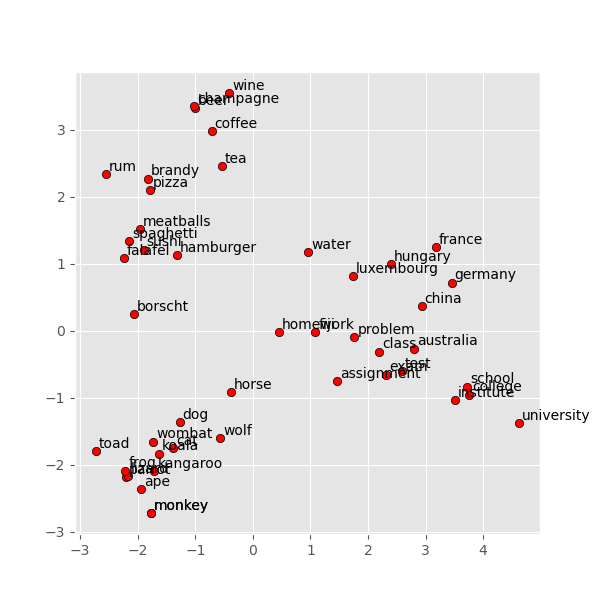

In [43]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [41]:
# display_pca_scatterplot(model, sample=300)